#PHYS 410/510 homework assignment for week 5

## Problem 1

Download City Positions from http://homework.uoregon.edu/pub/class/sciprog16/posit.txt
    
## Problem 2

### a. Cut and paste 5 initial cities from the list using an editor

Define a function to read a file into a list of city/states: produces a list of lists.


In [1]:
def read_city_file(filename):
    cities = []
    for line in open(filename, "r"):
        l = line.split()
        cities.append((l[0], l[1], float(l[2]), float(l[3])))
    #end for
    return cities
#end read_city_file

###b. Random path connecting all five cities

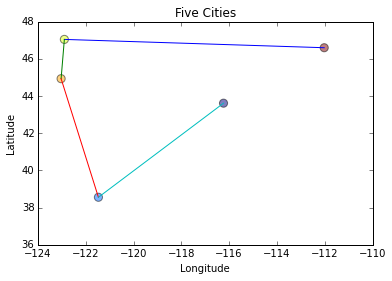

In [3]:
from math import *
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def graph_route(city_list, title):
    N = len(city_list)
    
    lon = np.zeros(N)
    lat = np.zeros(N)
    
    for i in range(N):
        city = city_list[i]
        lat[i] = city[2]
        lon[i] = city[3]
    #end for
    
    for i in range(N-1):
        x = (lon[i], lon[i+1])
        y = (lat[i], lat[i+1])
        plt.plot((lon[i], lon[i+1]), (lat[i], lat[i+1]))
    #end for

    colors = np.random.rand(N)
    plt.scatter(lon, lat, s=66, c=colors, alpha=0.5)

    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.title(title)
    plt.show()
#end graph_route

cities = read_city_file("starting_5.txt")

random.shuffle(cities)
graph_route(cities, "Five Cities")

###c. Brute force minimum path calculation starting at Boise

First define some useful functions to aid in calculating the shortest path by brute force.  Then use them to calculate shortest for path with Boise as a starting point.

In [4]:
import numpy as np
from itertools import permutations

# retrieve (lat,lon)
def get_lat_lon(city):
    return (city[2], city[3])
#end get_lat_lon

# define distance function
def distance(lat1,lon1,lat2,lon2):
    Re = 3959.    # kilometers
    lat1 = radians(lat1); lat2 = radians(lat2)
    lon1 = radians(lon1); lon2 = radians(lon2)
    dsig = acos(sin(lat1)*sin(lat2) + cos(lat1)*cos(lat2)*cos(lon2-lon1))
    return Re*dsig
#end distance

def distances(start, route, city_list):
    (lat1, lon1) = get_lat_lon(city_list[start])
    d = [0.0]
    for i in route:
        (lat2, lon2) = get_lat_lon(city_list[i])
        d.append(distance(lat1,lon1,lat2,lon2))
        lat1 = lat2
        lon1 = lon2
    #end for
    return d
#end distances

def round_trip_distance(city_list):
    route = range(len(city_list))
    route.append(route[0])
    route.remove(0)
    return sum(distances(0, route, city_list))
#end distances

def calc_shortest_path_slowly(city_list, dump_output):
    num_cities = len(city_list)

    ## generate permutations
    #
    routes = list(permutations(range(1,num_cities)))

    ## calculate and print path and distance for all routes
    #
    num_routes = len(routes)
    dist = []
    total_dist = np.zeros(num_routes)
    min_dist = 3e9
    min_index = -1
    for r in range(num_routes):
        route = routes[r]
        dist.append(distances(0, route, city_list))
        total_dist[r] = sum(dist[r])
        if min_dist > total_dist[r]:
            min_dist = total_dist[r]
            min_index = r
        #end if
        if dump_output: print dist[r], total_dist[r]
    #end for

    ## output results
    #
    visit = []
    min_route = routes[min_index]
    min_cities = [city_list[0][1]]
    for i in range(len(min_route)):
        min_cities.append(city_list[min_route[i]][1])
    #end for

    return (min_dist, min_cities)
#end calc_shortest_path_slowly

In [4]:
import time

cities = read_city_file("starting_5.txt")

start_time = time.clock()
(dist, visited) = calc_shortest_path_slowly(cities, True)
elapsed_time = time.clock() - start_time

print
print "Shortest route from Boise is %.1f miles" % (dist)
print "Visiting cities:", visited
print "Elapsed time was %.4f seconds" % (elapsed_time)


[0.0, 442.9489175518566, 733.3998480504358, 542.1919974804536, 146.03250635379652] 1864.57326944
[0.0, 442.9489175518566, 733.3998480504358, 514.2983337880949, 146.03250635379652] 1836.67960574
[0.0, 442.9489175518566, 447.7902175209955, 542.1919974804536, 514.2983337880949] 1947.22946634
[0.0, 442.9489175518566, 447.7902175209955, 146.03250635379652, 514.2983337880949] 1551.06997521
[0.0, 442.9489175518566, 590.8177518186517, 514.2983337880949, 542.1919974804536] 2090.25700064
[0.0, 442.9489175518566, 590.8177518186517, 146.03250635379652, 542.1919974804536] 1721.9911732
[0.0, 290.8256754133558, 733.3998480504358, 447.7902175209955, 146.03250635379652] 1618.04824734
[0.0, 290.8256754133558, 733.3998480504358, 590.8177518186517, 146.03250635379652] 1761.07578164
[0.0, 290.8256754133558, 542.1919974804536, 447.7902175209955, 590.8177518186517] 1871.62564223
[0.0, 290.8256754133558, 542.1919974804536, 146.03250635379652, 590.8177518186517] 1569.86793107
[0.0, 290.8256754133558, 514.29833

###d. shortest route for 7 random selected cities

In [5]:
import random
import time

all_cities = read_city_file("homework.cities.txt")
cities = random.sample(all_cities, 7)

start_time = time.clock()
(dist, visited) = calc_shortest_path_slowly(cities, False)
elapsed_time = time.clock() - start_time

print
print "Shortest route visiting 7 random cities is %.1f miles" % (dist)
print "Visiting cities:", visited
print "Elapsed time was %.4f seconds" % (elapsed_time)


Shortest route visiting 7 random cities is 2724.3 miles
Visiting cities: ['Harrisburg', 'Annapolis', 'Columbia', 'Tallahassee', 'Springfield', 'Denver', 'Salt_Lake_City']
Elapsed time was 0.0166 seconds


###d. shortest route for 11 random selected cities

In [6]:
cities = random.sample(all_cities, 11)

start_time = time.clock()
(dist, visited) = calc_shortest_path_slowly(cities, False)
elapsed_time = time.clock() - start_time

print
print "Shortest route visiting 11 random cities is %.1f miles" % (dist)
print "Visiting cities:", visited
print "Elapsed time was %.4f seconds" % (elapsed_time)


Shortest route visiting 11 random cities is 8470.7 miles
Visiting cities: ['Olympia', 'Bismarck', 'Des_Moines', 'Hartford', 'Providence', 'Raleigh', 'Jefferson_City', 'Oklahoma_City', 'Salt_Lake_City', 'Boise', 'Honolulu']
Elapsed time was 78.9490 seconds


##Problem 3
###a. Greedy algorithm

Cities visited are ['Little_Rock', 'Frankfort', 'Raleigh', 'Tallahassee', 'Madison', 'Concord', 'Olympia', 'Salem', 'Sacramento', 'Little_Rock']



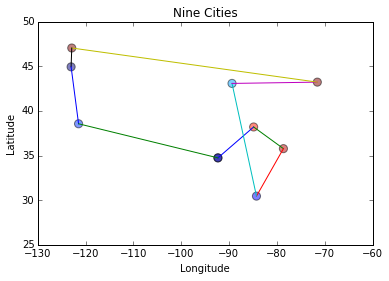

Round trip distance traveled is 7861.3 miles


In [14]:
def nearest_neighbor(start, city_list):
    (lat1, lon1) = get_lat_lon(start)
    min_index = -1
    min_dist = 3e9
    for i in range(len(city_list)):
        (lat2, lon2) = get_lat_lon(city_list[i])
        dist = distance(lat1,lon1,lat2,lon2)
        if dist < min_dist:
            min_dist = dist
            min_index = i
        #end if
    #end for
    return (min_index, min_dist)
#end nearest_neighbor

cities = read_city_file("prob3.cities.txt")

start = cities.pop(0)
route = [start]
visited = [start[1]]
dist = [0.0]
while len(cities) > 0:
    (index,min_dist) = nearest_neighbor(start, cities)
    visited.append(cities[index][1])
    dist.append(min_dist)
    start = cities.pop(index)
    route.append(start)
#end while

# add in return to original city
route.append(route[0])
visited.append(route[0][1])
total_dist = round_trip_distance(route)

print "Cities visited are", visited
print

graph_route(route, "Nine Cities")
print "Round trip distance traveled is %.1f miles" %(total_dist)

###b. Greedy + 2-opt

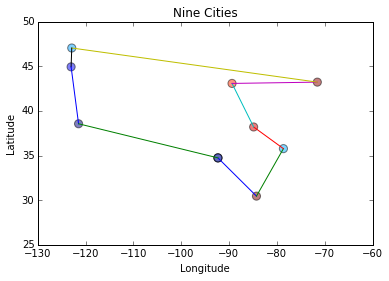

Round trip distance traveled is 7432.4 miles


In [15]:
save_city = route[1]
route[1] = route[3]
route[3] = save_city
route.append(route[0])
graph_route(route, "Nine Cities")

total_dist = round_trip_distance(route)
print "Round trip distance traveled is %.1f miles" %(total_dist)

##Problem 4
Gave up trying to program it as I think it will be shorter to partially solve by "hand."  But having a function to perform the switch will be handy.  Forget that, I'm lazy and good at emacs.

###a. Random start from Augusta
Because go west young man!

Cities visited are ['Montgomery', 'Atlanta', 'Columbia', 'Raleigh', 'Richmond', 'Annapolis', 'Dover', 'Trenton', 'Harrisburg', 'Albany', 'Hartford', 'Providence', 'Boston', 'Concord', 'Montpelier', 'Augusta', 'Charleston', 'Columbus', 'Frankfort', 'Indianapolis', 'Springfield', 'Jefferson_City', 'Topeka', 'Lincoln', 'Des_Moines', 'Saint_Paul', 'Madison', 'Lansing', 'Nashville', 'Little_Rock', 'Jackson', 'Baton_Rouge', 'Austin', 'Oklahoma_City', 'Santa_Fe', 'Denver', 'Cheyenne', 'Pierre', 'Bismarck', 'Helana', 'Boise', 'Salt_Lake_City', 'Carson_City', 'Sacramento', 'Salem', 'Olympia', 'Phoenix', 'Tallahassee']



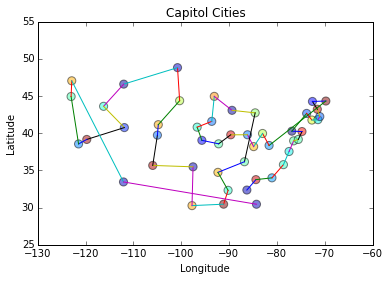

Round trip distance traveled is 12991.3 miles


In [19]:
cities = read_city_file("lower_48.cities.txt")

start = cities.pop(0)
route = [start]
visited = [start[1]]
dist = [0.0]
while len(cities) > 0:
    (index,min_dist) = nearest_neighbor(start, cities)
    visited.append(cities[index][1])
    dist.append(min_dist)
    start = cities.pop(index)
    route.append(start)
#end while

total_dist = round_trip_distance(route)

print "Cities visited are", visited
print

graph_route(route, "Capitol Cities")
print "Round trip distance traveled is %.1f miles" %(total_dist)

###b. Ordered cities using 2-opt for optimization

Cities visited are ['Augusta', 'Montpelier', 'Albany', 'Harrisburg', 'Charleston', 'Frankfort', 'Nashville', 'Little_Rock', 'Jefferson_City', 'Springfield', 'Indianapolis', 'Columbus', 'Lansing', 'Madison', 'Saint_Paul', 'Des_Moines', 'Lincoln', 'Topeka', 'Oklahoma_City', 'Santa_Fe', 'Denver', 'Cheyenne', 'Pierre', 'Bismarck', 'Helana', 'Boise', 'Olympia', 'Salem', 'Sacramento', 'Carson_City', 'Salt_Lake_City', 'Phoenix', 'Austin', 'Baton_Rouge', 'Jackson', 'Tallahassee', 'Montgomery', 'Atlanta', 'Columbia', 'Raleigh', 'Richmond', 'Annapolis', 'Dover', 'Trenton', 'Hartford', 'Providence', 'Boston', 'Concord', 'Augusta']



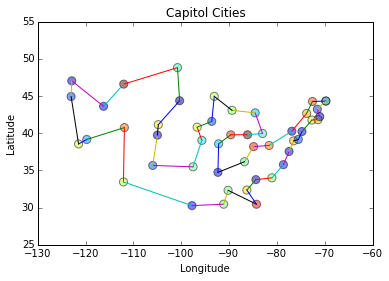

Round trip distance traveled is 11372.6 miles


In [22]:
cities = read_city_file("ordered.cities.txt")

ordered = []
for i in range(len(cities)):
    ordered.append(cities[i][1])
#end for

total_dist = round_trip_distance(cities)

print "Cities visited are", ordered
print

graph_route(cities, "Capitol Cities")
print "Round trip distance traveled is %.1f miles" %(total_dist)